In [1]:
from pyspark.sql import SparkSession
from graphframes import GraphFrame

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Community Detection with GraphFrames") \
    .config("spark.jars.packages", "graphframes:graphframes:0.8.2-spark3.0-s_2.12") \
    .getOrCreate()

# Load edges from CSV
edges_df = spark.read.csv("/home/sanyam/RAG/personal/BDA/git_web_ml/git_web_ml/musae_git_edges.csv", header=True, inferSchema=True).selectExpr("id_1 as src", "id_2 as dst")

# Generate vertices by finding unique IDs from edges
vertices_df = edges_df.selectExpr("src as id").union(edges_df.selectExpr("dst as id")).distinct()

# Create GraphFrame
graph = GraphFrame(vertices_df, edges_df)

# Run Label Propagation Algorithm for Community Detection
result = graph.labelPropagation(maxIter=5)
result.show()


24/11/28 09:34:39 WARN Utils: Your hostname, ihubanubhuti2023 resolves to a loopback address: 127.0.1.1; using 192.168.3.156 instead (on interface enp226s0)
24/11/28 09:34:39 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/home/sanyam/anaconda/envs/dikshant/lib/python3.12/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/sanyam/.ivy2/cache
The jars for the packages stored in: /home/sanyam/.ivy2/jars
graphframes#graphframes added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-48826488-fccc-4fa0-a4f3-0b4cf9fc9546;1.0
	confs: [default]
	found graphframes#graphframes;0.8.2-spark3.0-s_2.12 in spark-packages
	found org.slf4j#slf4j-api;1.7.16 in central
:: resolution report :: resolve 112ms :: artifacts dl 4ms
	:: modules in use:
	graphframes#graphframes;0.8.2-spark3.0-s_2.12 from spark-packages in [default]
	org.slf4j#slf4j-api;1.7.16 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   2   |   0   |   0   |   0   ||   2   |   0   |
	---------------------------------

+-----+-----+
|   id|label|
+-----+-----+
|37224|35773|
|19021|35773|
|28730|35773|
|31037|35773|
|34207|35773|
|23776| 5547|
|29127|35773|
| 9831|35773|
| 5354|35773|
|32676|35773|
| 4926|35773|
|29270| 5547|
|21377|35773|
|14609|31126|
|11852|35773|
| 8390|35773|
|28761|35773|
|10837|26963|
| 4992|35773|
|20894|35773|
+-----+-----+
only showing top 20 rows



In [ ]:
from graphframes import GraphFrame
import networkx as nx
import pandas as pd
from pyspark.sql import SparkSession
from graphframes import GraphFrame

spark = SparkSession.builder \
    .appName("Community Detection with GraphFrames") \
    .config("spark.jars.packages", "graphframes:graphframes:0.8.2-spark3.0-s_2.12") \
    .getOrCreate()

def graphframe_to_networkx(graph):
    edges = graph.edges.select("src", "dst").toPandas()
    nx_graph = nx.Graph()
    for index, row in edges.iterrows():
        nx_graph.add_edge(row['src'], row['dst'])
    return nx_graph


def girvan_newman(graph, max_iterations=5):

    nx_graph = graphframe_to_networkx(graph)
    

    communities = [list(nx.connected_components(nx_graph))]
    
    for i in range(max_iterations):
        edge_betweenness = nx.betweenness_centrality(nx_graph)
        
        edge_to_remove = max(edge_betweenness, key=edge_betweenness.get)
        
        nx_graph.remove_edge(*edge_to_remove)
        
        current_communities = list(nx.connected_components(nx_graph))
        if len(current_communities) > len(communities[-1]):
            communities.append(current_communities)
    
    return communities

edges_df = spark.read.csv("/home/sanyam/RAG/personal/BDA/git_web_ml/git_web_ml/musae_git_edges.csv", header=True, inferSchema=True).selectExpr("id_1 as src", "id_2 as dst")

vertices_df = edges_df.selectExpr("src as id").union(edges_df.selectExpr("dst as id")).distinct()

graph = GraphFrame(vertices_df, edges_df)

communities = girvan_newman(graph, max_iterations=5)
print("Communities detected by Girvan-Newman:")
for community in communities:
    print(community)


24/11/28 21:01:45 WARN Utils: Your hostname, ihubanubhuti2023 resolves to a loopback address: 127.0.1.1; using 192.168.3.156 instead (on interface enp226s0)
24/11/28 21:01:45 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/home/sanyam/anaconda/envs/dikshant/lib/python3.12/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/sanyam/.ivy2/cache
The jars for the packages stored in: /home/sanyam/.ivy2/jars
graphframes#graphframes added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-7d70a71a-6db9-4848-ba8f-c1a97fb790e5;1.0
	confs: [default]
	found graphframes#graphframes;0.8.2-spark3.0-s_2.12 in spark-packages
	found org.slf4j#slf4j-api;1.7.16 in central
:: resolution report :: resolve 115ms :: artifacts dl 4ms
	:: modules in use:
	graphframes#graphframes;0.8.2-spark3.0-s_2.12 from spark-packages in [default]
	org.slf4j#slf4j-api;1.7.16 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   2   |   0   |   0   |   0   ||   2   |   0   |
	---------------------------------

In [2]:
# Count the number of communities formed
num_communities = result.select("label").distinct().count()
print(f"Number of communities formed: {num_communities}")


Number of communities formed: 980


/tmp/ipykernel_2129505/750142506.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_labels))  # Use 'tab20' colormap or any other you prefer


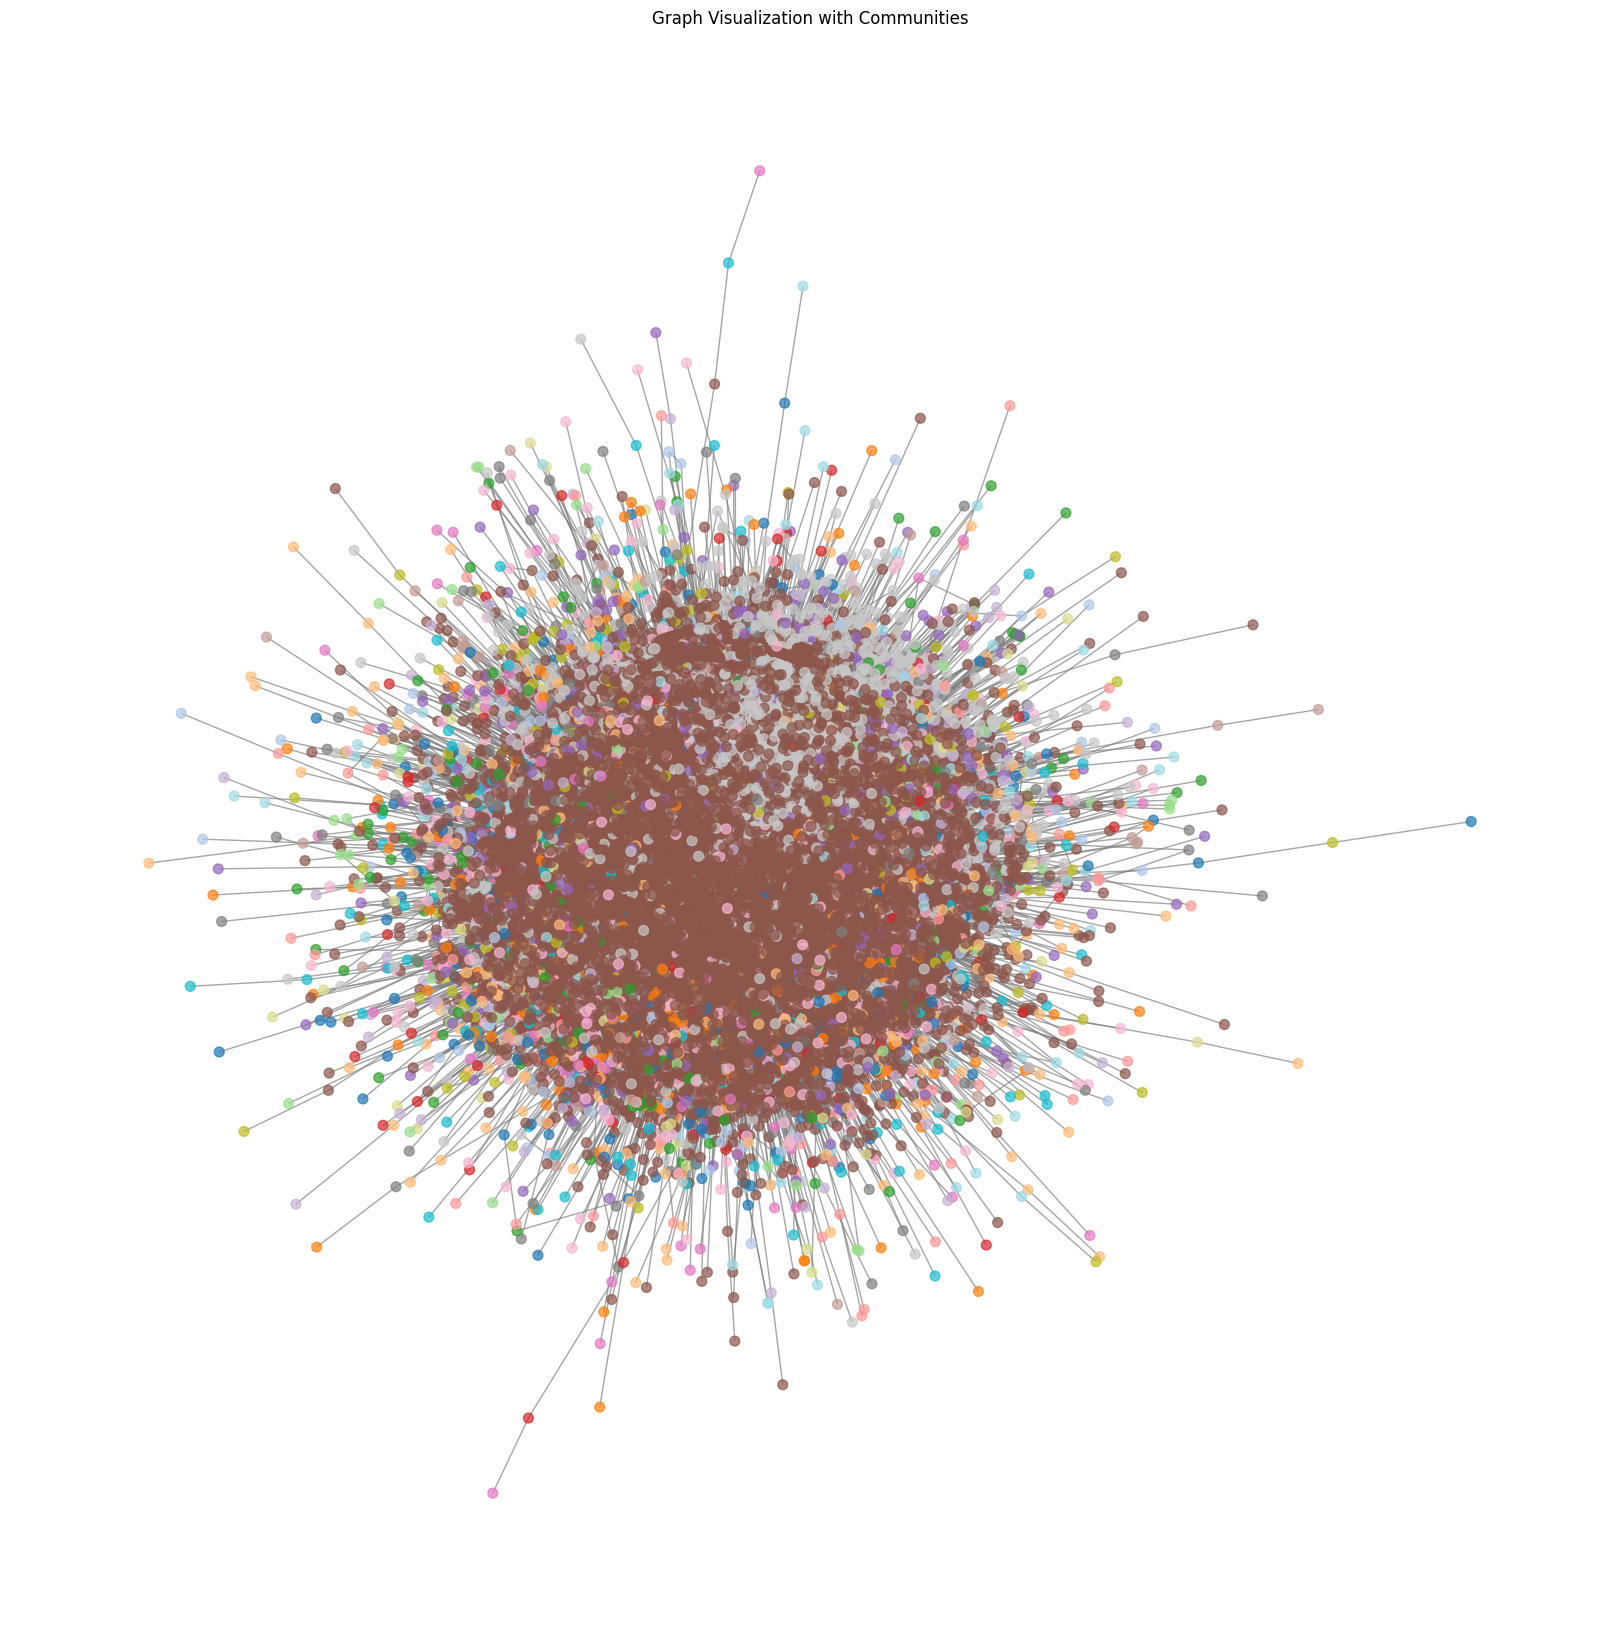

In [5]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the community result into a pandas DataFrame
result_pd = result.toPandas()

# Load edges from CSV (same as before)
csv_file = "/home/sanyam/RAG/personal/BDA/git_web_ml/git_web_ml/musae_git_edges.csv"
edges = pd.read_csv(csv_file).values.tolist()

# Create a NetworkX graph
G = nx.Graph()
G.add_edges_from(edges)

# Map each node to its community label
node_community_map = dict(zip(result_pd['id'], result_pd['label']))

# Create a color map for the communities
unique_labels = result_pd['label'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_labels))  # Use 'tab20' colormap or any other you prefer

# Assign a color to each node based on its community label
node_colors = [colors(node_community_map[node] % len(unique_labels)) for node in G.nodes()]

# Draw the graph with colored nodes based on communities
plt.figure(figsize=(16, 16))
pos = nx.spring_layout(G)  # Layout for better visualization

# Draw the nodes with community-specific colors
nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=50, edge_color="gray", alpha=0.7)

plt.title("Graph Visualization with Communities")
plt.show()


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import modularity

# # Convert Spark DataFrames to Pandas
vertices_pd = vertices_df.toPandas()
edges_pd = edges_df.toPandas()

# # Create a NetworkX graph
G = nx.Graph()
G.add_nodes_from(vertices_pd['id'])
G.add_edges_from(edges_pd[['src', 'dst']].values)

# # Draw the graph
# plt.figure(figsize=(12, 8))
# nx.draw(G, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
# plt.title("Graph Visualization")
# plt.show()

# Convert Spark result to Pandas
result_pd = result.toPandas()

# Extract communities (group by label)
communities = [
    list(group['id'])
    for _, group in result_pd.groupby('label')
]

# Compute modularity
modularity_value = modularity(G, communities)
print(f"Modularity: {modularity_value}")


Modularity: 0.2644500679134851


In [12]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from threading import Thread
import os
from tqdm import tqdm

# Create directory for saving graphs
output_dir = "graphs"
os.makedirs(output_dir, exist_ok=True)

# Load the community result into a pandas DataFrame
result_pd = result.toPandas()

# Load edges from CSV
csv_file = "/home/sanyam/RAG/personal/BDA/git_web_ml/git_web_ml/musae_git_edges.csv"
edges_df = pd.read_csv(csv_file, names=["src", "dst"], header=0)

# Map nodes to communities
node_community_map = dict(zip(result_pd['id'], result_pd['label']))

# Group nodes by community
communities = result_pd.groupby('label')['id'].apply(list).to_dict()

# Function to create and save graph for a single community
def create_community_graph(label, nodes):
    # Filter edges belonging to this community
    community_edges = edges_df[
        (edges_df['src'].isin(nodes)) & (edges_df['dst'].isin(nodes))
    ].values.tolist()


    if len(community_edges) == 0:
        print("No edges found for this community.")
        return
    print(f"Creating graph for Community {label} with {len(nodes)} nodes and {len(community_edges)} edges.")
    print(f"Nodes: {nodes}")
    print(f"Edges: {community_edges}")

    # Create a new graph for the community
    community_graph = nx.Graph()
    community_graph.add_edges_from(community_edges)

    # Draw the graph
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(community_graph)
    nx.draw(
        community_graph,
        pos,
        with_labels=True,
        node_color='skyblue',
        node_size=50,
        edge_color='gray',
        alpha=0.7
    )
    plt.title(f"Community {label}")
    plt.savefig(os.path.join(output_dir, f"community_{label}.png"))  # Save each graph as an image
    plt.close()


for label, nodes in tqdm(communities.items()):
    create_community_graph(label, nodes)

print("All community graphs created and saved as images.")


  0%|          | 4/980 [00:00<00:36, 26.81it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 107 with 21 nodes and 45 edges.
Nodes: [31605, 23266, 2875, 198, 18405, 14658, 23937, 32861, 2888, 2148, 35799, 19992, 24685, 14889, 29613, 25722, 24484, 7941, 17700, 19835, 32659]
Edges: [[198, 14658], [2148, 17700], [2148, 31605], [7941, 14658], [7941, 17700], [7941, 25722], [7941, 32659], [7941, 18405], [7941, 24484], [7941, 32861], [7941, 2888], [7941, 35799], [7941, 23937], [19992, 23937], [14658, 25722], [14658, 24685], [14658, 32861], [14658, 23266], [14658, 14889], [14658, 18405], [14658, 23937], [14889, 24484], [14889, 24685], [17700, 31605], [17700, 25722], [19835, 32861], [23266, 24685], [23266, 32861], [23266, 18405], [23937, 35799], [23937, 25722], [23937, 18405], [24484, 24685], [24685, 32861], [24685, 25722], [25722, 32861], [25722, 18405], [25722, 35799], [31605, 35799], [32659, 2888], [32861, 35799], [32861, 18405], [35799, 29613], [3579

  1%|          | 11/980 [00:00<00:39, 24.28it/s]

No edges found for this community.
Creating graph for Community 218 with 48 nodes and 7 edges.
Nodes: [23813, 3766, 5617, 30411, 19450, 12560, 37120, 16138, 5958, 17655, 34757, 14752, 6044, 13658, 11315, 2340, 37216, 25114, 26086, 9081, 11956, 21133, 28035, 17955, 33788, 21850, 18239, 17921, 19982, 27344, 33017, 21051, 3488, 71, 33464, 27088, 16916, 10810, 24003, 29353, 19147, 13426, 15339, 6587, 31828, 12773, 32954, 11843]
Edges: [[2340, 29353], [5617, 21133], [5617, 37216], [5617, 33017], [10810, 12773], [13658, 31828], [18239, 31828]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 600 with 5 nodes and 3 edges.
Nodes: [27347, 26964, 35792, 24542, 1035]
Edges: [[26964, 35792], [26964, 27347], [27347, 35792]]


  3%|▎         | 28/980 [00:00<00:19, 48.53it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 873 with 5 nodes and 1 edges.
Nodes: [10401, 7162, 15053, 11578, 3493]
Edges: [[3493, 7162]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 1151 with 5 nodes and 5 edges.
Nodes: [3666, 20344, 13917, 23089, 37343]
Edges: [[3666, 23089], [3666, 37343], [13917, 37343], [20344, 37343], [37343, 23089]]


  3%|▎         | 34/980 [00:00<00:19, 47.70it/s]

Creating graph for Community 1160 with 27 nodes and 85 edges.
Nodes: [12420, 11068, 2330, 36883, 6014, 1160, 7315, 37476, 35403, 35930, 23388, 10703, 450, 23379, 103, 3146, 35786, 11050, 6980, 5215, 22125, 23434, 8240, 23479, 21140, 14026, 27401]
Edges: [[103, 23434], [103, 27401], [103, 22125], [450, 23379], [450, 2330], [450, 3146], [450, 35403], [450, 1160], [450, 23434], [450, 6980], [450, 14026], [450, 27401], [450, 35786], [1160, 2330], [1160, 10703], [1160, 21140], [1160, 23388], [1160, 37476], [1160, 35403], [1160, 12420], [2330, 10703], [2330, 11050], [2330, 23388], [2330, 23479], [2330, 35403], [2330, 7315], [2330, 36883], [2330, 35930], [2330, 37476], [3146, 14026], [3146, 27401], [5215, 11050], [5215, 36883], [7315, 11068], [7315, 21140], [7315, 6980], [7315, 23434], [7315, 27401], [7315, 35403], [7315, 14026], [7315, 35930], [6014, 8240], [6980, 23379], [6980, 21140], [6980, 23434], [6980, 27401], [6980, 35403], [6980, 35786], [6980, 14026], [10703, 11068], [10703, 23434],

  4%|▍         | 39/980 [00:01<00:26, 35.32it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 1483 with 280 nodes and 1333 edges.
Nodes: [266, 28593, 34577, 23601, 21415, 13500, 14216, 8490, 8698, 33694, 31383, 1617, 33965, 30375, 26353, 8840, 37270, 16374, 23022, 31626, 28043, 29706, 27409, 21775, 29117, 35814, 18644, 13883, 26331, 21487, 29183, 37078, 537, 15961, 25421, 2964, 32288, 10425, 10117, 12364, 35796, 30734, 13447, 14510, 4922, 23333, 2904, 20244, 5691, 29318, 29552, 4788, 9225, 16100, 11089, 28295, 13765, 2141, 31123, 25667, 28346, 19808, 16880, 10298, 11111, 10740, 36656, 7033, 6180, 27555, 7629, 18776, 20124, 30669, 26254, 7636, 17463, 7646, 36716, 35051, 26255, 76, 8599, 2684, 15429, 3621, 26945, 23443, 2663, 7061, 35026, 12955, 13534, 34508, 31991, 9779, 31973, 32463, 4807, 20517, 8751, 9332, 14287, 8622, 11371, 4813, 35257, 3805, 26770, 33932, 9454, 30030, 7684, 10076, 22802, 22475, 5090, 16609,

  5%|▍         | 47/980 [00:01<00:44, 21.01it/s]

No edges found for this community.
Creating graph for Community 1656 with 2 nodes and 1 edges.
Nodes: [31898, 35329]
Edges: [[35329, 31898]]
No edges found for this community.
Creating graph for Community 1689 with 24 nodes and 69 edges.
Nodes: [25485, 17396, 20913, 36430, 27732, 22809, 32359, 34918, 13882, 5384, 11606, 5258, 20987, 5390, 33431, 29981, 36386, 1689, 2100, 35188, 22304, 22388, 28848, 35674]
Edges: [[29981, 13882], [29981, 35188], [1689, 28848], [1689, 5384], [1689, 33431], [1689, 5258], [1689, 35674], [1689, 22304], [1689, 27732], [1689, 20913], [1689, 2100], [1689, 22388], [1689, 36430], [2100, 5390], [2100, 33431], [2100, 28848], [2100, 22388], [2100, 36430], [2100, 13882], [2100, 35188], [2100, 27732], [2100, 36386], [28848, 22304], [28848, 5384], [28848, 33431], [28848, 5258], [28848, 5390], [28848, 22388], [28848, 13882], [28848, 35188], [28848, 35674], [28848, 34918], [28848, 20987], [28848, 27732], [28848, 36386], [5258, 5390], [5258, 5384], [5258, 33431], [5258, 

  5%|▌         | 53/980 [00:02<00:42, 21.78it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 1979 with 3 nodes and 3 edges.
Nodes: [10618, 619, 9604]
Edges: [[619, 9604], [619, 10618], [9604, 10618]]
No edges found for this community.
Creating graph for Community 1988 with 12 nodes and 37 edges.
Nodes: [28657, 31972, 22826, 2675, 8692, 10130, 8209, 1102, 1988, 28956, 9858, 690]
Edges: [[1988, 31972], [1988, 28657], [1988, 8692], [1988, 22826], [1988, 8209], [1988, 690], [1988, 2675], [1988, 9858], [1988, 10130], [2675, 10130], [2675, 8692], [2675, 690], [2675, 28657], [9858, 690], [9858, 8209], [9858, 8692], [9858, 28956], [9858, 31972], [8209, 8692], [8209, 22826], [8209, 690], [8209, 28657], [8209, 31972], [8209, 28956], [8209, 10130], [8692, 10130], [8692, 31972], [8692, 28956], [8692, 690], [8692, 28657], [10130, 690], [10130, 28657], [28657, 690], [22826, 690], [31972, 28956], [31972, 690], [28956, 690]]


  6%|▋         | 62/980 [00:02<00:32, 28.65it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 2078 with 158 nodes and 3 edges.
Nodes: [30551, 3871, 18724, 29545, 5992, 33700, 26247, 17554, 1215, 33332, 11464, 126, 5288, 173, 22509, 8644, 26988, 20133, 26912, 17357, 4195, 6316, 8052, 3636, 31832, 23173, 23559, 2106, 22885, 22411, 25885, 19652, 10809, 29169, 6922, 876, 19297, 16684, 11568, 3025, 19417, 14861, 17137, 21720, 13989, 24134, 31978, 6051, 24740, 1258, 16999, 23505, 23252, 29702, 31805, 12547, 34779, 19332, 17079, 25191, 24349, 15801, 17916, 26029, 37134, 11061, 10140, 28172, 37533, 28416, 35517, 590, 29897, 25549, 12973, 31906, 36965, 33857, 14471, 35498, 14926, 21258, 35131, 21389, 5713, 29890, 12938, 29670, 19282, 560, 3585, 3924, 19214, 22537, 34669, 1833, 696, 2747, 15932, 28693, 5099, 18693, 28678, 36489, 6190, 10462, 36140, 7324

  7%|▋         | 72/980 [00:02<00:26, 34.52it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 2634 with 3 nodes and 1 edges.
Nodes: [13151, 10022, 28669]
Edges: [[13151, 28669]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 3002 with 2 nodes and 1 edges.
Nodes: [5952, 8909]
Edges: [[5952, 8909]]


  8%|▊         | 83/980 [00:02<00:23, 38.64it/s]

No edges found for this community.
No edges found for this community.
Creating graph for Community 3053 with 7 nodes and 3 edges.
Nodes: [486, 19697, 13662, 1919, 25856, 9684, 35846]
Edges: [[13662, 25856], [13662, 35846], [25856, 35846]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 3349 with 2 nodes and 1 edges.
Nodes: [34617, 6000]
Edges: [[6000, 34617]]


 10%|▉         | 96/980 [00:03<00:19, 44.31it/s]

Creating graph for Community 3370 with 4 nodes and 3 edges.
Nodes: [30063, 21230, 10590, 30837]
Edges: [[10590, 30837], [10590, 21230], [30063, 30837]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 4066 with 4 nodes and 6 edges.
Nodes: [4066, 22635, 37502, 31303]
Edges: [[4066, 226

 12%|█▏        | 121/980 [00:03<00:14, 61.12it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 4243 with 6 nodes and 3 edges.
Nodes: [22122, 5594, 18071, 35099, 36032, 15033]
Edges: [[18071, 22122], [18071, 36032], [22122, 36032]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 4467 with 4 nodes and 2 edges.
Nodes: [5967, 22203, 14688, 36192]
Edges: [[5967, 14688], [14688, 36192]]


 13%|█▎        | 127/980 [00:03<00:17, 47.57it/s]

No edges found for this community.
Creating graph for Community 4536 with 2 nodes and 1 edges.
Nodes: [4536, 23474]
Edges: [[4536, 23474]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 4632 with 127 nodes and 212 edges.
Nodes: [17175, 3232, 15417, 22698, 3, 23062, 4632, 15004, 13364, 10395, 15519, 21134, 35221, 12216, 27224, 18432, 15287, 29871, 19571, 3075, 31183, 31038, 29440, 15670, 12132, 11490, 24504, 167, 12785, 23781, 20040, 36076, 17274, 13449, 26278, 25271, 990, 1967, 19054, 9581, 5289, 15271, 29227, 25118, 27616, 22951, 18092, 22623, 12862, 24633, 8265, 23185, 7519, 17790, 33877, 33548, 27918, 17237, 18272, 14079, 7727, 12837, 29596, 29064, 13314, 25515, 19954, 36777, 19999, 27071, 3802, 18499, 4584, 8884, 11950, 16131, 15439, 13491, 10581, 14796, 1000

 15%|█▌        | 147/980 [00:03<00:15, 52.74it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 5161 with 4 nodes and 3 edges.
Nodes: [4951, 12975, 8252, 3918]
Edges: [[3918, 8252], [3918, 4951], [4951, 8252]]
Creating graph for Community 5188 with 37 nodes and 17 edges.
Nodes: [19317, 20026, 35692, 13616, 7893, 869, 22025, 35236, 2783, 33756, 24597, 32368, 24855, 24961, 20350, 27049, 27926, 13806, 32613, 1989, 27779, 24094, 26765, 16748, 24863, 33331, 110, 21778, 9866, 14685, 31228, 16780, 22430, 30223, 20346, 17872, 10614]
Edges: [[24855, 32368], [24855, 26765], [24855

 16%|█▌        | 159/980 [00:04<00:17, 48.15it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 5314 with 66 nodes and 24 edges.
Nodes: [9052, 10018, 33083, 36050, 6765, 22380, 16315, 6612, 15710, 10694, 3966, 14459, 13165, 29556, 36309, 36143, 30675, 28798, 6371, 18546, 26316, 11322, 10566, 29059, 9357, 18246, 35187, 8257, 19287, 18685, 18891, 19120, 5078, 16910, 25025, 30652, 35815, 19798, 24254, 6194, 20728, 4725, 36124, 6428, 31807, 36686, 30421, 6777, 9657, 24879, 37023, 37264, 24763, 30268, 33619, 19395, 24818, 8971, 5746, 29282, 25594, 32636, 14343, 31232, 2415, 22405]
Edges: [[18685, 9657], [3966, 30268], [6371, 19798], [6371, 6777], [6371, 22405], [6371, 31232], [6371, 18246], [6371, 16910], [6371, 20728], [6371, 33619], [6428, 24254], [6777, 25594], [19798, 22405], [9657, 30268], [10694, 18891], [1132

 17%|█▋        | 168/980 [00:05<00:36, 22.35it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 5673 with 44 nodes and 5 edges.
Nodes: [33434, 19370, 17903, 6778, 12561, 26309, 31051, 30847, 29284, 12020, 32294, 872, 22158, 21655, 7064, 24634, 26006, 18190, 12567, 31213, 12997, 206, 12573, 5684, 20265, 19637, 25204, 24203, 37422, 30370, 23386, 20326, 20031, 37052, 22939, 9557, 16084, 8229, 7719, 32179, 17111, 30400, 4666, 20822]
Edges: [[12020, 12997], [12020, 12573], [12573, 12997], [16084, 4666], [18190, 21655]]
Creating graph for Community 5681 with 3 nodes and 3 edges.
Nodes: [7981, 5681, 11438]
Edges: [[5681, 7981], [5681, 11438], [7981, 11438]]


 18%|█▊        | 181/980 [00:05<00:24, 32.54it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 6178 with 7 nodes and 3 edges.
Nodes: [31789, 10825, 30844, 26803, 27435, 3017, 31782]
Edges: [[3017, 31789], [3017, 30844], [31789, 31782]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 6301 with 879 nodes and 4190 edges.
Nodes: [30114, 36572, 30427, 5688, 26450, 32083, 11475, 36139, 3196, 28858, 7285, 22270, 29872, 17667, 23568, 20671, 31628, 24849, 11853, 3639, 28527, 11295, 27434, 34839, 3944, 2134, 26706, 11593, 25620, 31382, 12453, 8221, 24021, 21183, 2

 20%|█▉        | 192/980 [00:10<02:30,  5.24it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 6543 with 6 nodes and 7 edges.
Nodes: [30106, 19258, 22730, 5990, 6543, 13432]
Edges: [[6543, 5990], [6543, 22730], [6543, 13432], [5990, 13432], [5990, 30106], [5990, 22730], [22730, 30106]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 6848 with 3 nodes and 1 edges.
Nodes: [21369, 30558, 36000]
Edges: [[21369, 36000]]


 20%|██        | 200/980 [00:10<01:39,  7.83it/s]

Creating graph for Community 6875 with 19 nodes and 32 edges.
Nodes: [25187, 16707, 32417, 13512, 11847, 37110, 20214, 16980, 31691, 20205, 33257, 9582, 6908, 1830, 27964, 6875, 4553, 16842, 18364]
Edges: [[4553, 32417], [4553, 16980], [6875, 13512], [6875, 1830], [6875, 20214], [6875, 6908], [6875, 9582], [6875, 32417], [6875, 20205], [6875, 33257], [6875, 16707], [9582, 25187], [9582, 11847], [9582, 33257], [11847, 25187], [11847, 32417], [11847, 33257], [13512, 18364], [13512, 32417], [13512, 20205], [13512, 20214], [13512, 16980], [16842, 32417], [16980, 32417], [18364, 6908], [18364, 20214], [20205, 33257], [25187, 37110], [37110, 6908], [37110, 32417], [32417, 27964], [32417, 33257]]
No edges found for this community.
Creating graph for Community 6887 with 2 nodes and 1 edges.
Nodes: [36010, 19870]
Edges: [[19870, 36010]]


 22%|██▏       | 216/980 [00:10<00:51, 14.90it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 7443 with 4 nodes and 2 edges.
Nodes: [18521, 33167, 9082, 2332]
Edges: [[2332, 33167], [9082, 18521]]
Creating graph for Community 7449 with 12 nodes and 15 edges.
Nodes: [14305, 472, 9111, 19988, 7449, 36681, 3125, 23772, 14592, 16651, 24278, 29114]
Edges: [[36681, 29114], [36681, 3125], [36681, 7449], [36681, 19988], [36681, 24278], [36681, 14305], [19988, 29114], [19988, 7449], [19988, 14305], [3125, 16651], [7449, 16651], [7449, 14305], [14305, 14592], [14305, 29114], [16651, 24278]]


 23%|██▎       | 226/980 [00:11<00:38, 19.80it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 7775 with 7 nodes and 3 edges.
Nodes: [8494, 11187, 33448, 22900, 8898, 24897, 2965]
Edges: [[11187, 22900], [33448, 22900], [22900, 8494]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 8095 with 13 nodes and 24 edges.
Nodes: [20665, 24247, 31162, 14064, 25495, 25232, 19717, 392, 33465, 23268, 2527, 8095, 1015]
Edges: [[392, 25495], [1015, 8095], [1015, 19717], [1015, 25495], [1015, 23268], [1015, 31162], [1015, 25232], [2527, 31162], [2527, 14064], [8095, 23268], [8095, 14064], [8095, 25495], [8095, 19717], [14064, 23268], [14064, 31162], [14064, 25495], [14064, 19717], [14064, 33465], [19717, 20665], [19717, 24247], [19717, 25232], [23268, 31162], [23268, 25495], [25232, 25495]]


 26%|██▌       | 250/980 [00:11<00:17, 42.07it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 8768 with 2 nodes and 1 edges.
Nodes: [9667, 117]
Edges: [[117, 9667]]
Creating graph for Community 8839 with 7 nodes and 4 edges.
Nodes: [31313, 2217, 8127, 22937, 26685, 35562, 14215]
Edges: [[2217, 

 27%|██▋       | 266/980 [00:11<00:14, 49.38it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 9345 with 4 nodes and 1 edges.
Nodes: [3946, 9345, 16394, 22287]
Edges: [[9345, 3946]]
Creating graph for Community 9351 with 11 nodes and 6 edges.
Nodes: [20999, 18334, 17359, 33504, 5749, 26219, 3544, 26120, 6548, 36269, 33849]
Edges: [[6548, 26120], [6548, 33849], [26219, 5749], [20999, 36269], [20999, 5749], [36269, 5749]]
Creating graph for Community 9381 with 3 nodes and 1 edges.
Nodes: [34431, 5305, 7735]
Edges: [[5305, 7735]]
No edges found for this community.
No edges

 28%|██▊       | 279/980 [00:12<00:17, 38.97it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 9991 with 4 nodes and 3 edges.
Nodes: [1007, 18168, 28899, 9991]
Edges: [[1007, 9991], [18168, 28899], [18168, 9991]]
Creating graph for Community 10000 with 5 nodes and 2 edges.
Nodes: [26270, 19181, 27658, 11471, 7505]
Edges: [[7505, 27658], [7505, 11471]]


 30%|██▉       | 291/980 [00:12<00:15, 43.20it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 10446 with 4 nodes and 2 edges.
Nodes: [19185, 30560, 32316, 12758]
Edges: [[12758, 32316], [30560, 32316]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 10661 with 2 nodes and 1 edges.
Nodes: [529, 855]
Edges: [[529, 855]]


 31%|███       | 301/980 [00:12<00:15, 42.52it/s]

No edges found for this community.
No edges found for this community.
Creating graph for Community 10715 with 30 nodes and 1 edges.
Nodes: [7077, 6253, 5568, 13125, 18446, 25901, 30393, 23736, 25809, 16520, 24475, 31959, 14754, 26640, 5291, 35098, 11667, 16720, 23572, 29228, 11681, 18986, 14313, 33861, 15889, 3504, 8670, 12598, 11404, 27709]
Edges: [[11667, 15889]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 11083 with 10 nodes and 1 edges.
Nodes: [20935, 26895, 12445, 24383, 3936, 4234, 8752, 20991, 32563, 6163]
Edges: [[12445, 8752]]


 32%|███▏      | 315/980 [00:12<00:13, 48.09it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 11211 with 3 nodes and 1 edges.
Nodes: [33437, 21783, 4518]
Edges: [[4518, 33437]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 11271 with 13 nodes and 36 edges.
Nodes: [17268, 28729, 13703, 18977, 30800, 8731, 4184, 18464, 25266, 16418, 32469, 6502, 31408]
Edges: [[4184, 16418], [4184, 25266], [4184, 13703], [4184, 18977], [4184, 30800], [4184, 8731], [4184, 6502], [4184, 28729], [4184, 31408], [4184, 18464], [6502, 28729], [6502, 18977], [6502, 25266], [6502, 30800], [6502, 13703], [28729, 13703], [28729, 18464], [28729, 30800], [8731, 18464], [8731, 30800], [13703, 31408], [13703, 17268], [13703, 25266], [13703, 18977], [13703, 30800], [13703, 18464], [17268, 18977], [17268, 30800], [17268, 32469], [18464, 18977], [18464, 31408],

 34%|███▍      | 335/980 [00:13<00:10, 59.09it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 12007 with 9 nodes and 16 edges.
Nodes: [32638, 23577, 26330, 34491, 24501, 14120, 4594, 4240, 33599]
Edges: [[4240, 14120], [4240, 4594], [4240, 24501], [4240, 34491], [4240, 26330], [4240, 33599], [4240, 23577], [4594, 14120], [4594, 33599], [14120, 34491], [14120, 33599], [24501, 34491], [24501, 23577], [24501, 32638], [33599, 34491], [34491, 23577]]
No edges found for this community.
No edges found for t

 35%|███▌      | 343/980 [00:13<00:10, 60.04it/s]

No edges found for this community.
Creating graph for Community 12321 with 13 nodes and 6 edges.
Nodes: [16343, 29518, 13699, 23498, 24604, 30967, 4274, 20151, 9189, 14504, 4797, 11859, 7953]
Edges: [[4274, 4797], [4274, 13699], [4797, 13699], [13699, 29518], [13699, 30967], [14504, 16343]]
Creating graph for Community 12348 with 85 nodes and 54 edges.
Nodes: [6987, 2818, 35942, 10589, 23487, 35901, 16288, 21108, 16037, 24169, 20451, 26941, 10461, 18794, 11591, 19564, 17410, 20322, 17387, 20521, 17065, 6590, 28486, 11887, 5272, 11318, 19574, 12203, 24939, 1622, 12622, 11123, 10217, 12556, 31246, 9366, 11117, 15777, 26854, 1322, 8524, 30758, 32778, 78, 31608, 18311, 19003, 13186, 6955, 37127, 23350, 22724, 35196, 13308, 2335, 11920, 30660, 14771, 17965, 18249, 28754, 28505, 15724, 18917, 34234, 2407, 32370, 27291, 4241, 18136, 26067, 7579, 12744, 32709, 19104, 15826, 30714, 23306, 25621, 21001, 7875, 1900, 22275, 35686, 19728]
Edges: [[1900, 19728], [1900, 22724], [1900, 21001], [1900, 

 36%|███▌      | 349/980 [00:13<00:14, 42.29it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 12539 with 13 nodes and 5 edges.
Nodes: [27716, 12924, 5899, 4871, 5575, 31941, 34013, 22605, 10813, 31342, 27505, 1513, 15406]
Edges: [[1513, 27716], [1513, 15406], [12924, 27505], [27505, 34013], [27505, 15406]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 13122 with 2 nodes and 1 edges.
Nodes: [35653, 22104]
Edges: [[

 38%|███▊      | 372/980 [00:13<00:10, 55.54it/s]

Creating graph for Community 13155 with 12 nodes and 18 edges.
Nodes: [34330, 13155, 1885, 5135, 6731, 9675, 8607, 37676, 11120, 27670, 28381, 28564]
Edges: [[8607, 13155], [13155, 37676], [13155, 11120], [13155, 27670], [13155, 5135], [13155, 28381], [9675, 34330], [9675, 37676], [9675, 11120], [11120, 37676], [11120, 5135], [11120, 28381], [11120, 27670], [27670, 5135], [27670, 28381], [28381, 37676], [28381, 5135], [34330, 37676]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 13514 with 6 nodes and 1 edges.
Nodes: [3461, 11256, 34067, 4437, 15422, 16464]
Edges: [[3461, 4437]]


 40%|███▉      | 389/980 [00:14<00:09, 60.58it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 14268 with 3 nodes and 1 edges.
Nodes: [22704, 12723, 14853]
Edges: [[22704, 12723]]
No edges found for this community.
Creating graph for Community 14462 with 4 nodes and 4 edges.
Nodes: [14656, 14462, 33908, 29022]
Edges: [[14462, 14656], [14462, 33908], [14462, 29022], [14656, 33908]]


 42%|████▏     | 409/980 [00:14<00:08, 67.01it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 15105 with 2 nodes and 1 edges.
Nodes: [13619, 26761]
Edges: [[13619, 26761]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for

 43%|████▎     | 423/980 [00:14<00:07, 72.72it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 15434 with 6 nodes and 8 edges.
Nodes: [37342, 28141, 15434, 19549, 34433, 37603]
Edges: [[37603, 34433], [19549, 28141], [19549, 34433], [19549, 15434], [37342, 34433], [28141, 34433], [28141, 15434], [15434, 34433]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 15715 with 5 nodes and 3 edges.
Nodes: [32248, 14531, 5303, 27990, 12245]
Edges: [[5303, 12245], [5303, 27990], [12245, 27990]]


 45%|████▌     | 444/980 [00:14<00:07, 71.18it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 16143 with 9 nodes and 17 edges.
Nodes: [12190, 17819, 36640, 16143, 33268, 32724, 26354, 6895, 16243]
Edges: [[6895, 12190], [6895, 36640], [6895, 16243], [6895, 32724], [12190, 17819], [12190, 36640], [12190, 16243], [12190, 32724], [12190, 26354], [12190, 33268], [12190, 16143], [36640, 32724], [36640, 16143], [16143, 16243], [16143, 32724], [16243, 32724], [16243, 33268]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 16343 with 11 nodes and 7 edges.
Nodes

 46%|████▌     | 452/980 [00:15<00:09, 56.55it/s]

No edges found for this community.
No edges found for this community.
Creating graph for Community 16385 with 2 nodes and 1 edges.
Nodes: [19097, 22873]
Edges: [[19097, 22873]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 16726 with 4 nodes and 1 edges.
Nodes: [1285, 7892, 22550, 29532]
Edges: [[22550, 29532]]


 48%|████▊     | 468/980 [00:15<00:08, 57.92it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 17010 with 3 nodes and 1 edges.
Nodes: [27368, 7475, 33595]
Edges: [[27368, 33595]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 17408 with 7 nodes and 6 edges.
Nodes: [13404, 12140, 24391, 19545, 34093, 17408, 25567]
Edges: [[25567, 12140], [25567, 24391], [25567, 34093], [25567, 17408], [17408, 24391], [19545, 24391]]


 49%|████▉     | 485/980 [00:15<00:08, 58.26it/s]

No edges found for this community.
No edges found for this community.
Creating graph for Community 17572 with 4 nodes and 4 edges.
Nodes: [29938, 20548, 35021, 2459]
Edges: [[2459, 35021], [2459, 29938], [2459, 20548], [20548, 35021]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 17668 with 3 nodes and 1 edges.
Nodes: [15509, 23480, 20008]
Edges: [[15509, 23480]]


 52%|█████▏    | 511/980 [00:15<00:06, 76.17it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 18667 with 2 nodes and 1 edges.
Nodes: [12777, 5290]
Edges: [[5290, 12777]]
No edges found for this community.
Creating graph for Community 18700 with 18 nodes and 11 edges.
Nodes: [7346, 36540, 15317, 19667, 34833, 16391, 33774, 33156,

 53%|█████▎    | 519/980 [00:16<00:10, 42.38it/s]

No edges found for this community.
No edges found for this community.
Creating graph for Community 18945 with 4 nodes and 1 edges.
Nodes: [34660, 4358, 2665, 4146]
Edges: [[4146, 4358]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.


 56%|█████▌    | 544/980 [00:16<00:05, 72.89it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 19905 with 3 nodes and 1 edges.
Nodes: [24239, 21632, 7042]
Edges: [[24239, 21632]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 19983 with 20 nodes and 35 edges.
Nodes: [22187, 26985, 24153, 36341, 35602, 29875, 18261, 11358, 36508, 19945, 8505, 9944, 8967, 19983, 6231, 21988, 1566, 30765, 13521, 14830]
Edges: [[6231, 24153], [1566, 24153], [26985, 13521], [26985, 24153], [26985, 14830], [26985, 22187], [8505, 18261], [8505, 13521], [8505, 24153], [8505, 21988], [8967, 21988], [19983, 13521], [19983, 21988], [19983, 24153], [9944, 13521], [13521, 18261], [13521, 24153], [13521, 22187], [13521, 21988], [13521, 19945], [13521, 35602], [18261, 24153], [18261, 21988]

 57%|█████▋    | 556/980 [00:16<00:07, 55.01it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 20228 with 2 nodes and 1 edges.
Nodes: [20228, 19042]
Edges: [[19042, 20228]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 20611 with 112 nodes and 29 edges.
Nodes: [15758, 19775, 10046, 22617, 13863, 14959, 155, 1168, 2103, 13602, 6218, 26885, 27841, 14954, 14218, 33446, 840, 16923, 17487, 26346, 22418, 1484, 1838, 6614, 15593, 7436, 24978, 976, 29144, 20448, 28489, 26021, 29894, 4954, 20834, 32134, 1193, 9088, 28725, 36041, 36155, 56, 29039, 17840, 24212, 13254, 28944, 13577, 25269, 28203, 12000, 25981, 516, 27697, 23996, 18257, 30242, 17846, 35946, 23634, 27265, 23357, 5698, 2291, 34442, 1138

 58%|█████▊    | 573/980 [00:17<00:07, 56.35it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 20853 with 4 nodes and 1 edges.
Nodes: [20853, 36954, 20851, 10141]
Edges: [[20853, 36954]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 21508 with 8 nodes and 4 edges.
Nodes: [12804, 208, 24789, 6965, 29585, 15263, 36641, 33114]
Edges: [[208, 6965], [208, 24789], [208, 33114], [6965, 33114]]


 59%|█████▉    | 581/980 [00:17<00:07, 56.45it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 22782 with 78 nodes and 60 edges.
Nodes: [11857, 11854, 3185, 26318, 29667, 3212, 4785, 27881, 2607, 5376, 23784, 20962, 31056, 2589, 15667, 7877, 856, 36315, 30136, 

 63%|██████▎   | 613/980 [00:17<00:05, 69.31it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 23105 with 17 nodes and 8 edges.
Nodes: [13733, 16523, 28394, 15319, 11601, 660, 22209, 37119, 638, 21417, 26076, 33655, 8932, 14174, 10021, 10256, 5963]
Edges: [[638, 11601], [10021, 16523], [10021, 11601], [10256, 16523], [11601, 16523], [26076, 33655], [26076, 5963], [33655, 5963]]
No edges found for this community.
No edges found for this community.
Creating graph for Community 23150 with 12 nodes and 1 edges.
Nodes: [37330, 10734, 3569, 5835, 24316, 22933, 26061, 14071, 35760, 984, 394, 16189]
Edges: [[14071, 10734]]


 63%|██████▎   | 621/980 [00:17<00:06, 56.82it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 23439 with 3 nodes and 2 edges.
Nodes: [28082, 6355, 4010]
Edges: [[4010, 28082], [28082, 6355]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.

 65%|██████▌   | 641/980 [00:18<00:04, 71.05it/s]

Creating graph for Community 24223 with 3 nodes and 3 edges.
Nodes: [24223, 22777, 2988]
Edges: [[2988, 24223], [2988, 22777], [22777, 24223]]
Creating graph for Community 24238 with 3 nodes and 1 edges.
Nodes: [20112, 15694, 6208]
Edges: [[15694, 20112]]


 67%|██████▋   | 657/980 [00:18<00:04, 65.07it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 24711 with 14 nodes and 11 edges.
Nodes: [32593, 374, 26707, 11030, 33130, 28326, 10702, 4616, 1077, 10914, 16732, 22440, 27507, 32489]
Edges: [[1077, 26707], [1077, 32593], [1077, 11030], [1077, 33130], [4616, 10914], [28326, 32593], [22440, 10914], [26707, 32593], [26707, 10914], [32593, 10914], [10914, 33130]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Communi

 68%|██████▊   | 664/980 [00:18<00:05, 60.98it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 25249 with 12 nodes and 3 edges.
Nodes: [34357, 11769, 35327, 14762, 2807, 32231, 20152, 24719, 4288, 34240, 23029, 20360]
Edges: [[32231, 11769], [32231, 24719], [24719, 11769]]


 69%|██████▉   | 676/980 [00:19<00:08, 35.54it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 25393 with 23 nodes and 15 edges.
Nodes: [25393, 34337, 14100, 13099, 9436, 14378, 13331, 24329, 8619, 11394, 9655, 6656, 5417, 34957, 17943, 14820, 31260, 17171, 5585, 23640, 1320, 27892, 26299]
Edges: [[34957, 31260], [34957, 14820], [31260, 24329], [31260, 13099], [5417, 25393], [9436, 25393], [11394, 13099], [13099, 25393], [13099, 14100], [13099, 34337], [13099, 17943], [24329, 25393], [25393, 8619], [25393, 23640], [25393, 26299]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No ed

 71%|███████   | 697/980 [00:19<00:05, 55.13it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 26463 with 9 nodes and 19 edges.
Nodes: [2627, 29077, 17452, 2437, 26683, 31450, 7834, 5934, 27160]
Edges: [[2627, 7834], [2627, 31450], [2627, 26683], [2627, 27160], [2627, 17452], [2437, 27160], [2437, 5934], [2437, 7834], [2437, 17452], [5934, 26683], [5934, 27160], [7834, 26683], [7834, 31450], [7834, 17452], [17452, 26683], [17452, 27160], [26683, 29077], [26683, 31450], [26683, 27160]]
No edges found for this community.
Creating graph for Community 26589 with 2 nodes and 1 edges.
Nodes: [11043, 3926]
Edges: [[3926, 11043]]


 72%|███████▏  | 704/980 [00:19<00:05, 47.20it/s]

No edges found for this community.
No edges found for this community.
Creating graph for Community 26649 with 33 nodes and 5 edges.
Nodes: [300, 33943, 1347, 16607, 1115, 26036, 15917, 18583, 5959, 25321, 27162, 3297, 6174, 21341, 25761, 26284, 35662, 4123, 30699, 22310, 7765, 17324, 30041, 7309, 3539, 11405, 22174, 7493, 25804, 15483, 32854, 15927, 7876]
Edges: [[11405, 17324], [11405, 25761], [11405, 30041], [25761, 17324], [30041, 17324]]
No edges found for this community.
No edges found for this community.
Creating graph for Community 26918 with 103 nodes and 278 edges.
Nodes: [17638, 28969, 1498, 9972, 21378, 26303, 19296, 3440, 6744, 11518, 30650, 30552, 3396, 16867, 4936, 36796, 12768, 442, 25142, 33449, 5644, 35064, 2110, 12117, 3978, 21084, 16690, 27766, 9253, 25796, 4427, 13384, 26918, 5740, 24911, 17553, 7166, 10391, 30055, 20791, 29503, 2271, 21726, 9116, 15292, 10821, 22346, 11535, 5153, 15857, 27653, 10224, 13328, 32240, 4784, 9093, 11157, 16044, 21371, 5966, 22557, 28402

 72%|███████▏  | 710/980 [00:20<00:13, 20.40it/s]

Creating graph for Community 26999 with 13 nodes and 16 edges.
Nodes: [28448, 15928, 24413, 3400, 32909, 24990, 32557, 13213, 17157, 6029, 33567, 3635, 25559]
Edges: [[3400, 28448], [3400, 32909], [3400, 17157], [3400, 33567], [3635, 15928], [3635, 25559], [17157, 32909], [17157, 15928], [17157, 33567], [24413, 15928], [25559, 28448], [15928, 6029], [15928, 28448], [15928, 33567], [28448, 33567], [6029, 32557]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 27250 with 155 nodes and 380 edges.
Nodes: [5171, 23178, 36878, 21432, 13112, 30804, 12145, 7947, 14425, 28571, 10124, 31989, 18520, 18433, 5269, 2444, 11880, 33488, 36762, 5584, 30282, 28352, 33606, 8787, 24553, 8910, 28684, 9952, 1315, 18636, 35779, 12617, 22992, 34950, 11563, 18213, 11948, 10273, 11941, 23147, 1152, 13191, 13189, 32159, 3007

 73%|███████▎  | 720/980 [00:21<00:12, 21.63it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 27321 with 3 nodes and 3 edges.
Nodes: [27321, 2508, 34823]
Edges: [[2508, 34823], [2508, 27321], [27321, 34823]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 27803 with 50 nodes and 6 edges.
Nodes: [1550, 23262, 3360, 322, 20858, 22956, 29093, 36908, 16498, 11220, 170, 25330, 37347, 2018, 28605, 11905, 30127, 2226, 25487, 16978, 12074, 6082, 3880, 3124, 21656, 24277, 21248, 2634, 32092, 26213, 35247, 11263, 14657, 23159, 15442, 33495, 27533, 24228, 33059, 6689, 3984, 34147, 34743, 6381, 26869, 15425, 34993, 3489, 29522, 887]
Edges: [[2018, 25330], [2226, 27533

 74%|███████▍  | 730/980 [00:21<00:08, 29.78it/s]

No edges found for this community.
Creating graph for Community 27890 with 5 nodes and 7 edges.
Nodes: [26883, 6795, 4955, 27890, 14621]
Edges: [[4955, 26883], [4955, 6795], [4955, 14621], [6795, 14621], [6795, 27890], [26883, 14621], [14621, 27890]]
Creating graph for Community 27923 with 76 nodes and 209 edges.
Nodes: [5456, 8366, 5572, 28265, 15447, 4248, 14386, 32962, 12124, 13531, 5243, 25691, 27923, 18606, 36984, 25664, 26393, 33005, 6798, 24367, 3659, 21761, 18266, 4956, 13285, 25785, 5653, 4763, 3823, 37262, 30194, 7199, 23123, 13383, 27845, 9188, 11243, 3856, 36749, 17991, 13346, 34912, 15383, 28098, 16930, 14893, 22720, 22483, 19355, 27406, 10355, 25710, 33094, 30091, 26275, 18573, 19281, 37006, 13835, 24358, 16074, 22098, 23534, 14729, 24050, 8545, 7387, 12406, 8198, 13643, 3949, 31826, 32566, 36999, 1531, 2803]
Edges: [[3659, 28098], [3659, 15383], [3659, 23534], [3659, 36984], [3659, 25785], [3823, 32566], [4248, 33094], [4763, 36984], [4956, 28098], [4956, 7387], [4956, 7

 76%|███████▌  | 742/980 [00:21<00:08, 29.60it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 28174 with 2 nodes and 1 edges.
Nodes: [10923, 24132]
Edges: [[24132, 10923]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 28793 with 5 nodes and 6 edges.
Nodes: [18531, 28793, 10932, 30718, 34703]
Edges: [[18531, 30718], [18531, 34703], [18531, 28793], [10932, 34703], [10932, 28793], [28793, 34703]]


 78%|███████▊  | 760/980 [00:21<00:05, 41.12it/s]

No edges found for this community.
Creating graph for Community 28805 with 6 nodes and 3 edges.
Nodes: [12879, 2258, 14072, 33836, 5244, 6760]
Edges: [[6760, 14072], [6760, 33836], [14072, 33836]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 29382 with 3 nodes and 3 edges.
Nodes: [29382, 6635, 16813]
Edges: [[6635, 16813], [6635, 29382], [16813, 29382]]


 78%|███████▊  | 768/980 [00:22<00:04, 44.79it/s]

No edges found for this community.
Creating graph for Community 29439 with 101 nodes and 805 edges.
Nodes: [15825, 32069, 32137, 31286, 3761, 25339, 31558, 21386, 12996, 17021, 10591, 26012, 5504, 33592, 9899, 2567, 32230, 18577, 26804, 19741, 16536, 36553, 29439, 16320, 32767, 20053, 16785, 9615, 5635, 33003, 9099, 18121, 4461, 6784, 6710, 7138, 3330, 29719, 11763, 28862, 11108, 27390, 6989, 20066, 31165, 16562, 1348, 14571, 36409, 31094, 34984, 34341, 16801, 27952, 35199, 32912, 34142, 13224, 25708, 22001, 25700, 25436, 24416, 16212, 34542, 2940, 35804, 15843, 2656, 14713, 22454, 9370, 3281, 20613, 34740, 7241, 25934, 22269, 2046, 6491, 749, 25050, 20740, 3826, 1069, 33098, 27282, 24555, 7780, 19316, 32308, 3565, 35979, 34222, 11844, 34128, 27838, 27243, 27481, 8925, 1526]
Edges: [[24555, 29439], [24555, 2567], [24555, 1526], [31094, 27282], [1069, 32069], [1348, 3565], [1348, 29439], [1348, 27282], [1348, 1526], [1526, 3761], [1526, 16320], [1526, 24416], [1526, 20053], [1526, 35804

 79%|███████▉  | 774/980 [00:22<00:05, 35.43it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 29819 with 2 nodes and 1 edges.
Nodes: [25008, 32036]
Edges: [[25008, 32036]]
Creating graph for Community 29879 with 15 nodes and 2 edges.
Nodes: [25041, 18117, 10688, 36480, 29970, 18139, 21154, 5902, 9838, 22424, 5505, 23026, 16848, 25959, 30713]
Edges: [[25041, 18117], [25041, 21154]]


 80%|███████▉  | 783/980 [00:22<00:06, 31.53it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 30112 with 6 nodes and 8 edges.
Nodes: [18192, 17261, 34343, 17073, 32318, 9969]
Edges: [[9969, 18192], [9969, 34343], [9969, 17073], [9969, 32318], [17073, 18192], [17073, 32318], [17073, 34343], [18192, 32318]]
Creating graph for Community 30130 with 3 nodes and 3 edges.
Nodes: [30130, 30855, 13692]
Edges: [[30130, 30855], [30130, 13692], [13692, 30855]]


 80%|████████  | 787/980 [00:22<00:06, 31.51it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 30408 with 2 nodes and 1 edges.
Nodes: [5239, 12819]
Edges: [[5239, 12819]]
Creating graph for Community 30471 with 7 nodes and 7 edges.
Nodes: [14317, 35105, 26550, 20606, 31666, 30471, 2331]
Edges: [[2331, 14317], [2331, 30471], [2331, 31666], [2331, 35105], [14317, 30471], [26550, 30471], [30471, 31666]]


 82%|████████▏ | 805/980 [00:23<00:04, 43.05it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 31081 with 16 nodes and 3 edges.
Nodes: [4743, 35183, 9241, 3965, 37682, 406, 247, 873, 24638, 18806, 25385, 11536, 12514, 33316, 30822, 30897]
Edges: [[11536, 25385], [11536, 37682], [11536, 12514]]
Creating graph for Community 31126 with 5987 nodes and 39668 edges.
Nodes: [14609, 9025, 14554, 37370, 12857, 9154, 37145, 1310, 17239, 17476, 36329, 20466, 13160, 22868, 16565, 14299, 19203, 34202, 5708, 17611, 22268, 24026, 32420, 23236, 27338, 15526, 17909, 34536, 6066, 3655, 31508, 7229, 28494, 18938, 24505, 16

 83%|████████▎ | 812/980 [02:05<10:34,  3.78s/it]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 31323 with 8 nodes and 8 edges.
Nodes: [8028, 24672, 32805, 5254, 13240, 31323, 22360, 27883]
Edges: [[24672, 8028], [24672, 32805], [24672, 22360], [24672, 31323], [24672, 27883], [5254, 27883], [8028, 27883], [22360, 31323]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 31395 with 19 nodes and 2 edges.
Nodes: [7453, 34131, 13023, 20713, 24727, 26323, 11215, 4083, 15783, 21351, 17978, 6081, 20663, 9979, 17374, 17321, 5012, 18170, 19783]
Edges: [[19783, 18170], [13023, 18170]]


 83%|████████▎ | 817/980 [02:06<07:30,  2.76s/it]

Creating graph for Community 31467 with 2 nodes and 1 edges.
Nodes: [31467, 24870]
Edges: [[24870, 31467]]
No edges found for this community.
No edges found for this community.
Creating graph for Community 31577 with 6 nodes and 2 edges.
Nodes: [29211, 3003, 16298, 18676, 9050, 36075]
Edges: [[18676, 3003], [18676, 36075]]


 84%|████████▍ | 825/980 [02:06<04:06,  1.59s/it]

No edges found for this community.
No edges found for this community.
Creating graph for Community 31640 with 2 nodes and 1 edges.
Nodes: [17040, 24359]
Edges: [[17040, 24359]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 32322 with 11 nodes and 2 edges.
Nodes: [36242, 27018, 36752, 36993, 16659, 6339, 8013, 24926, 4308, 20183, 8304]
Edges: [[27018,

 86%|████████▌ | 843/980 [02:06<01:23,  1.64it/s]

No edges found for this community.
Creating graph for Community 32340 with 5 nodes and 5 edges.
Nodes: [15532, 18052, 4407, 32340, 30473]
Edges: [[4407, 15532], [4407, 32340], [15532, 30473], [15532, 32340], [30473, 32340]]
Creating graph for Community 32346 with 2 nodes and 1 edges.
Nodes: [26748, 27203]
Edges: [[26748, 27203]]
Creating graph for Community 32373 with 14 nodes and 8 edges.
Nodes: [1316, 30653, 25389, 1588, 18367, 14130, 2560, 30360, 33305, 17431, 20480, 22451, 11440, 26329]
Edges: [[2560, 30360], [33305, 1316], [14130, 1316], [14130, 18367], [20480, 1316], [1316, 30360], [1316, 1588], [26329, 25389]]
No edges found for this community.
Creating graph for Community 32409 with 48 nodes and 184 edges.
Nodes: [35129, 29225, 32409, 11698, 29221, 32291, 20895, 24716, 10892, 1707, 26154, 17858, 686, 4202, 641, 28191, 28207, 21467, 16472, 12714, 6181, 37688, 15671, 12902, 29130, 30573, 866, 26464, 10238, 22079, 31012, 29692, 3030, 417, 35521, 2163, 35279, 15260, 12201, 17037, 3

 87%|████████▋ | 854/980 [02:07<00:49,  2.55it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 32582 with 11 nodes and 1 edges.
Nodes: [9867, 33421, 14190, 4959, 32801, 35726, 19822, 36019, 33328, 36369, 2147]
Edges: [[33328, 33421]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 33144 with 2 nodes and 1 edges.
Nodes: [24099, 27186]
Edges: [[24099, 27186]]


 88%|████████▊ | 866/980 [02:07<00:26,  4.32it/s]

No edges found for this community.
No edges found for this community.
Creating graph for Community 33219 with 4 nodes and 3 edges.
Nodes: [8080, 2492, 35053, 34808]
Edges: [[8080, 35053], [8080, 34808], [34808, 35053]]
No edges found for this community.
Creating graph for Community 33252 with 10 nodes and 3 edges.
Nodes: [25014, 27899, 31727, 3516, 37353, 5237, 34698, 31144, 17570, 19610]
Edges: [[25014, 34698], [25014, 37353], [34698, 37353]]


 89%|████████▉ | 872/980 [02:08<00:22,  4.73it/s]

Creating graph for Community 33291 with 49 nodes and 45 edges.
Nodes: [14990, 31806, 2202, 8952, 28809, 30937, 6704, 9085, 33960, 6741, 8994, 36594, 24968, 31275, 23574, 14368, 8109, 13590, 37671, 26509, 12914, 25226, 23160, 34052, 4465, 28642, 29248, 23083, 10812, 16805, 1352, 26079, 33291, 24241, 4016, 10186, 6442, 27459, 11454, 22358, 18939, 4092, 25990, 8711, 8771, 13996, 30998, 24564, 33357]
Edges: [[2202, 23574], [27459, 16805], [27459, 22358], [27459, 28642], [27459, 33291], [4016, 33291], [4092, 25226], [4092, 33291], [33291, 6704], [33291, 8711], [33291, 22358], [33291, 30998], [33291, 34052], [33291, 12914], [33291, 30937], [33291, 24564], [33291, 28642], [33291, 23160], [33291, 25226], [33291, 10186], [33291, 33960], [33291, 23574], [33291, 25990], [33291, 8952], [33291, 23083], [8711, 33960], [8711, 25990], [8711, 24241], [8711, 30998], [8711, 16805], [8711, 22358], [8711, 31275], [8771, 23160], [13996, 14990], [13996, 23160], [14368, 25990], [14368, 31806], [22358, 37671],

 90%|████████▉ | 880/980 [02:08<00:14,  6.75it/s]

Creating graph for Community 33515 with 3 nodes and 2 edges.
Nodes: [33515, 26178, 19009]
Edges: [[33515, 26178], [19009, 26178]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 33961 with 13 nodes and 11 edges.
Nodes: [18811, 15865, 24748, 30676, 14028, 19796, 35868, 25352, 23404, 25978, 33961, 2485, 8846]
Edges: [[2485, 33961], [25352, 33961], [25352, 35868], [33961, 19796], [33961, 24748], [33961, 30676], [23404, 35868], [24748, 25978], [24748, 30676], [30676, 18811], [30676, 35868]]


 94%|█████████▍| 919/980 [02:08<00:02, 27.58it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for t

 95%|█████████▌| 931/980 [02:08<00:01, 33.65it/s]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 35773 with 25206 nodes and 180178 edges.
Nodes: [37224, 19021, 28730, 31037, 34207, 29127, 9831, 5354, 32676, 4926, 21377, 11852, 8390, 28761, 4992, 20894, 21780, 34787, 28235, 30103, 1780, 16132, 22467, 2117, 16321, 9336, 24971, 33169, 14595, 18872, 24688, 17430, 12881, 1732, 27850, 18259, 28338, 16794, 2938, 21834, 19165, 23795, 28836, 35017, 31062, 28412, 32643, 24831, 6613, 3118, 30107, 17895, 19615, 26900, 34931, 28704, 36398, 23034, 14860, 26735, 17639, 5863, 18690, 17341, 36449, 33168, 36945, 15538, 26498, 21649, 26578, 12532, 18584, 34099, 32931, 34268, 27210, 2744, 28328, 7572, 10498, 29876, 19085, 32067,

 96%|█████████▌| 936/980 [25:51<29:06, 39.70s/it]

Creating graph for Community 35827 with 11 nodes and 9 edges.
Nodes: [33729, 36832, 18788, 35827, 15440, 17320, 28047, 12193, 35354, 9538, 16591]
Edges: [[35827, 15440], [35827, 35354], [35827, 33729], [35827, 16591], [16591, 17320], [16591, 15440], [16591, 33729], [9538, 35354], [33729, 35354]]
No edges found for this community.
Creating graph for Community 35866 with 3 nodes and 2 edges.
Nodes: [9389, 10291, 2985]
Edges: [[9389, 10291], [9389, 2985]]


 97%|█████████▋| 951/980 [25:51<09:28, 19.62s/it]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 36350 with 2 nodes and 1 edges.
Nodes: [31339, 598]
Edges: [[598, 31339]]
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for thi

100%|█████████▉| 977/980 [25:51<00:23,  7.88s/it]

No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
No edges found for this community.
Creating graph for Community 37415 with 19 nodes and 1 edges.
Nodes: [25453, 2058, 2877, 18992, 7160, 4695, 6410, 2029, 2011, 27528, 3190, 13831, 6001, 9571, 20046, 25410, 27294, 13535, 1827]
Edges: [[7160, 13831]]
Creating graph for Community 37433 with 6 nodes and 4 edges.
Nodes: [17830, 30936, 24552, 19698, 8245, 16061]
Edges: [[30936, 8245], [19698, 24552], [19698, 8245], [8245, 24552]]


100%|██████████| 980/980 [25:51<00:00,  1.58s/it]

No edges found for this community.
No edges found for this community.
All community graphs created and saved as images.


In [8]:
for i, (label, nodes) in enumerate(communities.items()):
    print(f"Community {label} : {nodes}")
    if i == 10:
        break

Community 92 : [6776, 6997, 19558, 33843, 15533]
Community 101 : [28400, 6384, 36168, 7222, 13172, 8302, 474, 32477, 22016, 18029, 16204, 11208, 15418, 4950, 9704, 28480, 158, 15135, 26279, 13743, 3215]
Community 104 : [10750]
Community 107 : [31605, 23266, 2875, 198, 18405, 14658, 23937, 32861, 2888, 2148, 35799, 19992, 24685, 14889, 29613, 25722, 24484, 7941, 17700, 19835, 32659]
Community 113 : [8459, 11368]
Community 146 : [22137]
Community 176 : [283]
Community 182 : [12749, 17138, 18376, 27466, 18749, 25272, 34820, 3923, 18422, 7263, 7580, 3602, 11163, 17586, 14300, 23037, 22740, 32698, 182, 20401, 14045, 28074, 6364, 745, 7098, 37678, 34277, 28610, 8949, 17904, 33936, 31640, 21274, 2326, 21227, 18099, 34767, 18949, 18940, 5217, 23893, 8261, 7063, 6968, 16943, 12293, 5511, 31011, 5624, 35905, 15675, 27563, 33046, 5298, 4420, 26743, 10028, 7624, 14613, 20446, 4642, 9472, 3354, 1408, 32191, 15924, 3110, 36516, 441, 10906, 31459, 1061, 18473, 36510, 10709, 25860, 13673, 20135, 34364